## 概率模型

In [3]:
import pandas as pd

In [7]:
filename = '10k_articles.txt'
file = open(filename,encoding='utf-8')
all_content = file.read()

In [8]:
len(all_content)

4273738

In [15]:
all_content[-200:]

'术人员刘兴泽（前左）与肯尼亚员工一起工作。\\n2012年3月，肯尼亚联合南苏丹和埃塞俄比亚启动了“拉穆港－南苏丹－埃塞俄比亚交通走廊”项目。项目包括铁路、公路和石油管线等诸多组成部分，总投资额约250亿美元。同年，中国交建从17家通过资格预审的国际公司中脱颖而出，获得拉穆港项目的承建权。自2016年4月开工，一年来各项工程进展顺利，截至4月底已完成总工程量的四分之一。\\n新华社记者潘思危摄\\n\\n'

In [24]:
import re
all_content = ''.join(re.findall('[\w|\d]+', all_content))
all_content[-200:]

'位于肯尼亚东北部曼达湾海域的拉穆港项目中国技术人员刘兴泽前左与肯尼亚员工一起工作n2012年3月肯尼亚联合南苏丹和埃塞俄比亚启动了拉穆港南苏丹埃塞俄比亚交通走廊项目项目包括铁路公路和石油管线等诸多组成部分总投资额约250亿美元同年中国交建从17家通过资格预审的国际公司中脱颖而出获得拉穆港项目的承建权自2016年4月开工一年来各项工程进展顺利截至4月底已完成总工程量的四分之一n新华社记者潘思危摄nn'

In [18]:
import requests

In [21]:
text = requests.get('https://movie.douban.com/').text

![](https://img1.doubanio.com/view/photo/s_ratio_poster/public/p2529206747.jpg)

# Unigram
$P(W_0W_1W_2W_n)=P(W_0)\cdot P(W_1)\cdot P(W_2)\cdot P(W_n)$

In [22]:
from collections import Counter
L = [1,1,2,3,4,4,4]
Counter(L)

Counter({1: 2, 2: 1, 3: 1, 4: 3})

In [26]:
all_chars_countered = Counter(all_content)
all_chars_countered.most_common()

[('的', 77214),
 ('n', 75342),
 ('国', 37896),
 ('1', 35800),
 ('在', 33603),
 ('中', 32082),
 ('一', 31643),
 ('日', 31494),
 ('2', 31092),
 ('0', 30503),
 ('新', 30093),
 ('年', 23859),
 ('月', 22981),
 ('人', 22108),
 ('社', 20252),
 ('大', 19959),
 ('华', 19739),
 ('赛', 16882),
 ('是', 16857),
 ('和', 16186),
 ('发', 16062),
 ('行', 15768),
 ('有', 15721),
 ('5', 15691),
 ('为', 15451),
 ('7', 15421),
 ('了', 14918),
 ('上', 14435),
 ('4', 14129),
 ('不', 13902),
 ('会', 13735),
 ('业', 13431),
 ('外', 13427),
 ('球', 11872),
 ('3', 11445),
 ('以', 11395),
 ('时', 11351),
 ('地', 11351),
 ('者', 11344),
 ('代', 11259),
 ('对', 11171),
 ('作', 11130),
 ('家', 11080),
 ('市', 10896),
 ('6', 10811),
 ('成', 10787),
 ('出', 10693),
 ('生', 10532),
 ('个', 10180),
 ('体', 10163),
 ('来', 10076),
 ('进', 10062),
 ('比', 10027),
 ('这', 9937),
 ('开', 9929),
 ('动', 9819),
 ('１', 9740),
 ('公', 9696),
 ('学', 9676),
 ('全', 9618),
 ('０', 9575),
 ('法', 9440),
 ('展', 9102),
 ('队', 9097),
 ('线', 9014),
 ('场', 8984),
 ('多', 8982),
 ('合', 89

In [27]:
import  matplotlib.pyplot  as plt
Max = all_chars_countered.most_common()[0][1]
Max

77214

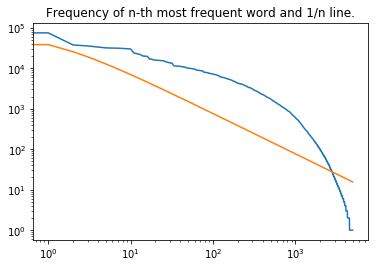

In [28]:
from matplotlib.pyplot import yscale, xscale, title, plot
yscale('log'); xscale('log'); title('Frequency of n-th most frequent word and 1/n line.')
plot([c for (w, c) in all_chars_countered.most_common()])
plot([Max/i for i in range(1, len(all_chars_countered)+1)]);

In [39]:
SUM = sum(all_chars_countered.values())
def get_char_prob(char_):
    return all_chars_countered[char_]/SUM;

In [41]:
import time
def get_running_time(func, arg, times):
    start_time = time.time()
    for _ in range(times):
        func(arg)
    print('\t\t {} used time is {}'.format(func.__name__, time.time() - start_time))

In [45]:
get_running_time(get_char_prob, '我', 10000)  

		 get_char_prob used time is 0.0020134449005126953


In [49]:
from functools import reduce
from operator import mul, add
reduce(mul,range(1,9))

40320

In [96]:
def get_unigram_prob(phrase):
    return reduce(mul,[get_char_prob(char_) for char_ in phrase])

In [97]:
get_string_prob('人生在勤不索何获')

2.2742862704092942e-24

## 2-Gram
$$ Pr(w_ow_1w_2...w_n) = Pr(w_1 | w_0) \cdot Pr(w_2 | w_1) ... \cdot Pr(w_n | w_{n-1})$$
$$ Pr(w_1 | w_0) = \frac{Pr(w_1 w_0)}{Pr(w_0)} $$

In [82]:
def get_n_gram_words(phrase,n):
    return [phrase[i:i+n] for i in range(len(phrase) - n)]
_2_gram_words = get_n_gram_words(all_content,2) 
# [all_content[i:i+gram_length] for i in range(len(all_content) - gram_length)]
two_gram_countered = Counter(_2_gram_words)

In [83]:
two_gram_countered.most_common()[:10]

[('新华', 17100),
 ('华社', 16228),
 ('20', 15929),
 ('nn', 14571),
 ('01', 13403),
 ('17', 10807),
 ('中国', 10029),
 ('n新', 9970),
 ('外代', 8228),
 ('7年', 7405)]

In [93]:
SUM2 = sum(two_gram_countered.values())
def get_2_gram_simple_prob(phrase):
    phrase_2_gram_words = get_n_gram_words(phrase,2)
    return reduce(mul,[(1 if two_gram_countered[term] == 0 else two_gram_countered[term])/SUM2 for term in phrase_2_gram_words])

In [119]:
def get_2_gram_prob(phrase):
    return get_unigram_prob(phrase[-1:]) * get_2_gram_simple_prob(phrase) / get_unigram_prob(phrase)

In [114]:
get_unigram_prob("正是一个好看的小猫")

3.845980106752109e-25

In [110]:
get_unigram_prob("真是一个好看的小猫")

1.2404409802330127e-25

In [118]:
get_2_gram_prob("正是一个好看的小猫")

4.2949110151689094e-07

In [116]:
get_2_gram_prob("真是一个好看的小猫")

3.72234548354892e-11